In [ ]:
import PIL
import numpy as np
from PIL import Image

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [ ]:
import numpy as np

In [ ]:
x_train=np.load('/content/x_128_train.npy')
x_test=np.load('/content/x_128_test.npy')
x_valid=np.load('/content/x_128_valid.npy')

In [ ]:
len(x_valid)

240

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


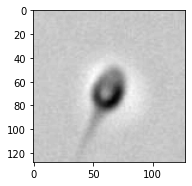

In [ ]:
for i in range(0, 10):
	plt.subplot(1,2,2)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
x_valid = tf.cast(x_valid, tf.float32)

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    cval=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
y_train=np.load('/content/y_head_train.npy')
y_test=np.load('/content/y_head_test.npy')
y_valid=np.load('/content/y_head_valid.npy')

In [ ]:
y_train = tf.cast(y_train, tf.float32)
y_test = tf.cast(y_test, tf.float32)
y_valid = tf.cast(y_valid, tf.float32)

In [ ]:
print(x_train.shape)  
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
print(x_train.shape)  

(1000, 128, 128)
(1000, 128, 128, 3)


In [ ]:
print(x_test.shape)  
x_test = np.repeat(x_test[..., np.newaxis], 3, -1)
print(x_test.shape)  

(300, 128, 128)
(300, 128, 128, 3)


In [ ]:
print(x_valid.shape)  
x_valid = np.repeat(x_valid[..., np.newaxis], 3, -1)
print(x_valid.shape)  

(240, 128, 128)
(240, 128, 128, 3)


In [ ]:
datagen.fit(x_train)

In [ ]:
x_train = datagen.flow(x_train,y_train,batch_size=30)
x_valid = valid_datagen.flow(x_valid,y_valid,batch_size=30)
x_test= valid_datagen.flow(x_test,y_test,batch_size=30)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [ ]:

basemodel=tf.keras.applications.VGG19(weights='imagenet',include_top=False, input_tensor=Input(shape=(224,224,3)))

80142336/80134624 [==============================] - 2s 0us/step


In [ ]:
basemodel.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
basemodel.trainable=False

In [ ]:
x = basemodel.output
x = GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(256,activation='relu')(x)
x = Dropout(0.3)(x)
x=Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation= 'sigmoid')(x)
model = Model(inputs = basemodel.input, outputs = predictions)

In [ ]:
from keras.optimizers import SGD, Adam

adam = Adam(lr=0.0001)

model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.input.shape


TensorShape([None, 224, 224, 3])

In [ ]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

hist = model.fit(steps_per_epoch=34,x=x_train, validation_data= x_valid,epochs=25,callbacks=[checkpoint])


Epoch 1/25
34/34 [==============================] - ETA: 0s - loss: 0.6297 - accuracy: 0.6830
Epoch 00001: val_accuracy improved from -inf to 0.73333, saving model to vgg16_1.h5
34/34 [==============================] - 248s 7s/step - loss: 0.6297 - accuracy: 0.6830 - val_loss: 0.5855 - val_accuracy: 0.7333
Epoch 2/25
34/34 [==============================] - ETA: 0s - loss: 0.6095 - accuracy: 0.7190
Epoch 00002: val_accuracy did not improve from 0.73333
34/34 [==============================] - 248s 7s/step - loss: 0.6095 - accuracy: 0.7190 - val_loss: 0.5985 - val_accuracy: 0.7333
Epoch 3/25
34/34 [==============================] - ETA: 0s - loss: 0.5898 - accuracy: 0.7250
Epoch 00003: val_accuracy did not improve from 0.73333
34/34 [==============================] - 248s 7s/step - loss: 0.5898 - accuracy: 0.7250 - val_loss: 0.5961 - val_accuracy: 0.7333
Epoch 4/25
34/34 [==============================] - ETA: 0s - loss: 0.6010 - accuracy: 0.7250
Epoch 00004: val_accuracy did not improv

In [ ]:
model.load_weights('vgg16_1.h5')

In [ ]:
preds = model.evaluate(x_test,verbose=1)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
y_pred=model.predict(x_test)
for i in range(0,300):
  if y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

y_pred
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score ,roc_auc_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred,average='macro'))
print(precision_score(y_test,y_pred,average='macro'))
print(recall_score(y_test,y_pred,average='macro'))
#print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test,y_pred,average='macro'))
#plot_confusion_matrix(model,x_test,y_test,values_format='d')
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
plot_confusion_matrix(cm=cm,classes=[0,1] ,title='Confusion Matrix')